## Classification

Datasets used :
- PoetryFoundationData.csv
- Poem_classification
- topics folder

Might be complicated to merge these datasets cause first one is multi label, second one contains 4 very large classes, and last one more than 100 very specific classes.

For multiclass classification, **Poem_classification** and **topics folder**:
- study data
- treatment to apply : remove \n ? remove punctuation ? remove poems with length < n ? lemmatization ?
- tokenizer : train own ? nltk ?
- embedding : countvectorizer ? tf-idf ? gensim ? word2vec ? own features ?
- Logistic Regression (might test other multiclass models)

For multilabel classification, **PoetryFoundationData.csv**:
- same as before
- vectorize labels
- https://www.linkedin.com/pulse/algorithms-multiclass-classification-amir-hossein-takbiri/

In [21]:
import pandas as pd
import numpy as np
import os
import string
import matplotlib.pyplot as plt
import statistics

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#### Poem_classification - test/train_data.csv

In [2]:
tmp1 = pd.read_csv("../data_raw/Poem_classification - test_data.csv")
tmp2 = pd.read_csv("../data_raw/Poem_classification - train_data.csv")

df_Poem_classification = pd.concat([tmp1, tmp2], ignore_index=True)
df_Poem_classification.rename(columns={"Genre": "labels", "Poem": "poem"}, inplace=True)
df_Poem_classification = df_Poem_classification[["poem", "labels"]]

classes = np.unique(df_Poem_classification["labels"], return_counts=True)
for i in range(len(classes)):
    print(f"{classes[0][i]} : {classes[1][i]} samples")

Affection : 241 samples
Death : 247 samples


In [3]:
print(df_Poem_classification.head()["poem"][0])

A woman walks by the bench I’m sitting onwith her dog that looks part Lab, part Buick,stops and asks if I would like to dance.I smile, tell her of course I do. We decideon a waltz that she begins to hum.


I tried to do a script which checks if each word is in the vocabulary from the nltk **brown** corpus, and if not split it with the most probable tokens but it didn't work that well.

#### topics folder

In [4]:
topics = os.listdir("../data_raw/topics")
df_topics_list = []
for topic in topics:
    files = os.listdir(f"../data_raw/topics/{topic}")
    df_topic = pd.DataFrame(columns=["poem", "labels"])
    i = 0
    for filename in files:
        with open(f"../data_raw/topics/{topic}/{filename}", encoding="utf8") as f:
            df_topic.loc[i] = {"poem": f.read(), "labels": topic}
        i += 1
    df_topics_list.append(df_topic)

df_topics = pd.concat(df_topics_list, ignore_index=True)

In [5]:
classes = np.unique(df_topics["labels"], return_counts=True)
print(f"Number of classes : {len(classes[1])}\n")
for i in range(len(classes[0])):
    print(f"{classes[0][i]} : {classes[1][i]} samples")

Number of classes : 144

alone : 100 samples
america : 100 samples
angel : 100 samples
anger : 98 samples
animal : 100 samples
baby : 100 samples
beach : 100 samples
beautiful : 100 samples
beauty : 100 samples
believe : 99 samples
birth : 100 samples
brother : 100 samples
butterfly : 100 samples
car : 98 samples
carpe diem : 99 samples
change : 99 samples
chicago : 98 samples
childhood : 99 samples
children : 100 samples
christmas : 100 samples
cinderella : 100 samples
city : 99 samples
courage : 98 samples
crazy : 100 samples
culture : 99 samples
dance : 100 samples
dark : 100 samples
daughter : 98 samples
death : 100 samples
depression : 99 samples
despair : 99 samples
destiny : 100 samples
dream : 100 samples
evil : 99 samples
faith : 99 samples
family : 100 samples
father : 99 samples
fear : 99 samples
fire : 100 samples
food : 100 samples
football : 99 samples
freedom : 99 samples
friend : 100 samples
frog : 100 samples
funeral : 99 samples
funny : 100 samples
future : 100 sample

As we can see, we have a really nice distributed number of sample for each one of the 144 different classes.

In [6]:
stop_words = stopwords.words("english")

In [7]:
test_string = df_topics.head()["poem"][0].replace("\n", " ").lower()

print(test_string)
print(" ".join([word for word in test_string.split() if word not in stop_words]))

loneliness his childhood warms him up loneliness he warms up to his childhood loneliness childhood his heaven loneliness his childhood a repository of warmth meditation my heart on a sea of sublimity so lonely a poem helps fill out the emptiness loneiness the world a graveyard so lonely i cheer up myself writing a poem about loneliness so lonely i write a poem  to fill out the emptiness
loneliness childhood warms loneliness warms childhood loneliness childhood heaven loneliness childhood repository warmth meditation heart sea sublimity lonely poem helps fill emptiness loneiness world graveyard lonely cheer writing poem loneliness lonely write poem fill emptiness


In [8]:
print(df_topics.iloc[0]["poem"].translate(str.maketrans('', '', string.punctuation)))

loneliness
his childhood
warms him up
loneliness
he warms up to
his childhood
loneliness
childhood
his heaven
loneliness
his childhood
a repository of warmth
meditation
my heart on
a sea of sublimity
so lonely
a poem helps fill out
the emptiness
loneiness
the world
a graveyard
so lonely
i cheer up myself
writing a poem about loneliness
so lonely
i write a poem  to fill out
the emptiness


In [9]:
# only very few last lines of poems are not part of it, i.e. written by
for i in range(100, 200):
    print(i)
    print(df_topics.iloc[i]["poem"].split("\n")[-1])

100
Ha...America!
101
---Cheung Shun Sang=Cauchy3---
102
Only after Swamiji’s lectures.
103
Of all its pow'r disarms!
104
collecting dollars from passing automobiles.
105
Which sees and says: more: more and more: always more.
106
''God mend thine every flaw''.
107
This is eternal death, and this the torment long foretold.'
108
Site in 1965 by Johnson.
109
And can guide the world as a whole towards peace and prosperity in the real sense
110
Where the air is full of sunlight and the flag is full of stars.
111
As he subdued the empire of the heart.
112
We pray, in faith, thy triumph may be brief!
113
Viva America!
114
who had a different dream.
115
(I’m actually too optimistic to believe this or let it worry me……! ! !)
116
Watching us as we fight for peace both night, and day.
117
with all it has to face.
118
Can, and does live.
119
America will always be my land.
120
cherish America
121
Like priceless treasures sinking in the sand.
122
Be thou thyself, and thyself alone, as heaven hath p

In [31]:
df = df_topics
df["poem"] = df["poem"].str.replace("\n", " ").str.lower().str.translate(str.maketrans('', '', string.punctuation + "‘’")).replace("\d+",  "", regex=True)
df["poem"] = df["poem"].apply(lambda poem: " ".join([word for word in poem.split() if word not in stop_words]))
print(len(df))

14334


In [32]:
df = df[df["poem"].str.len() > 20]
print(len(df))

14297


### Data analysis

In [12]:
text_df = pd.DataFrame(df["labels"])
text_df['len'] = df["poem"].apply(len)
print("Mean length of poems (in characters) : ", int(text_df['len'].mean()))
print("Min length of poems (in characters) : ", text_df['len'].min())
print("Max length of poems (in characters) : ", text_df['len'].max())

Mean length of poems (in characters) :  636
Min length of poems (in characters) :  21
Max length of poems (in characters) :  44594


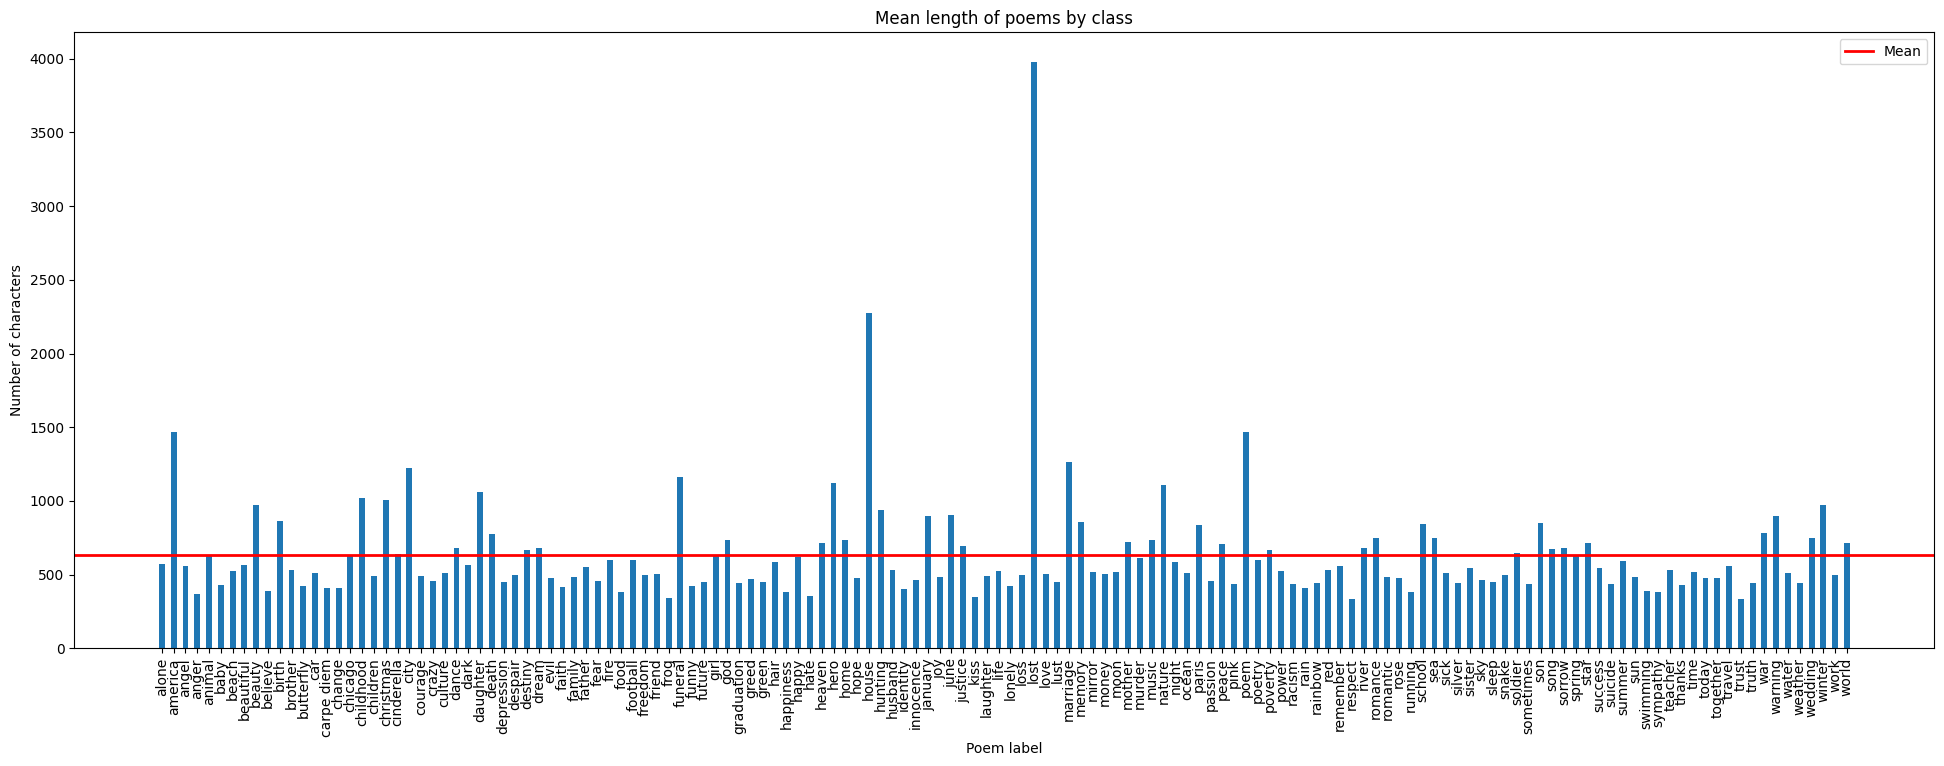

In [13]:
df_mean_length = text_df.groupby('labels').mean().reset_index()

plt.figure(figsize=(24, 8))
plt.bar(x=df_mean_length["labels"], height=df_mean_length["len"], width=0.5)

plt.xlabel('Poem label')
plt.ylabel('Number of characters')
plt.title('Mean length of poems by class')
plt.axhline(y=int(text_df['len'].mean()), color='r', linestyle='-', linewidth=2, label='Mean')
plt.legend()

plt.xticks(rotation=90)

plt.show()

Since almost all classes have poems of same length, it won't be an useful feature to use.

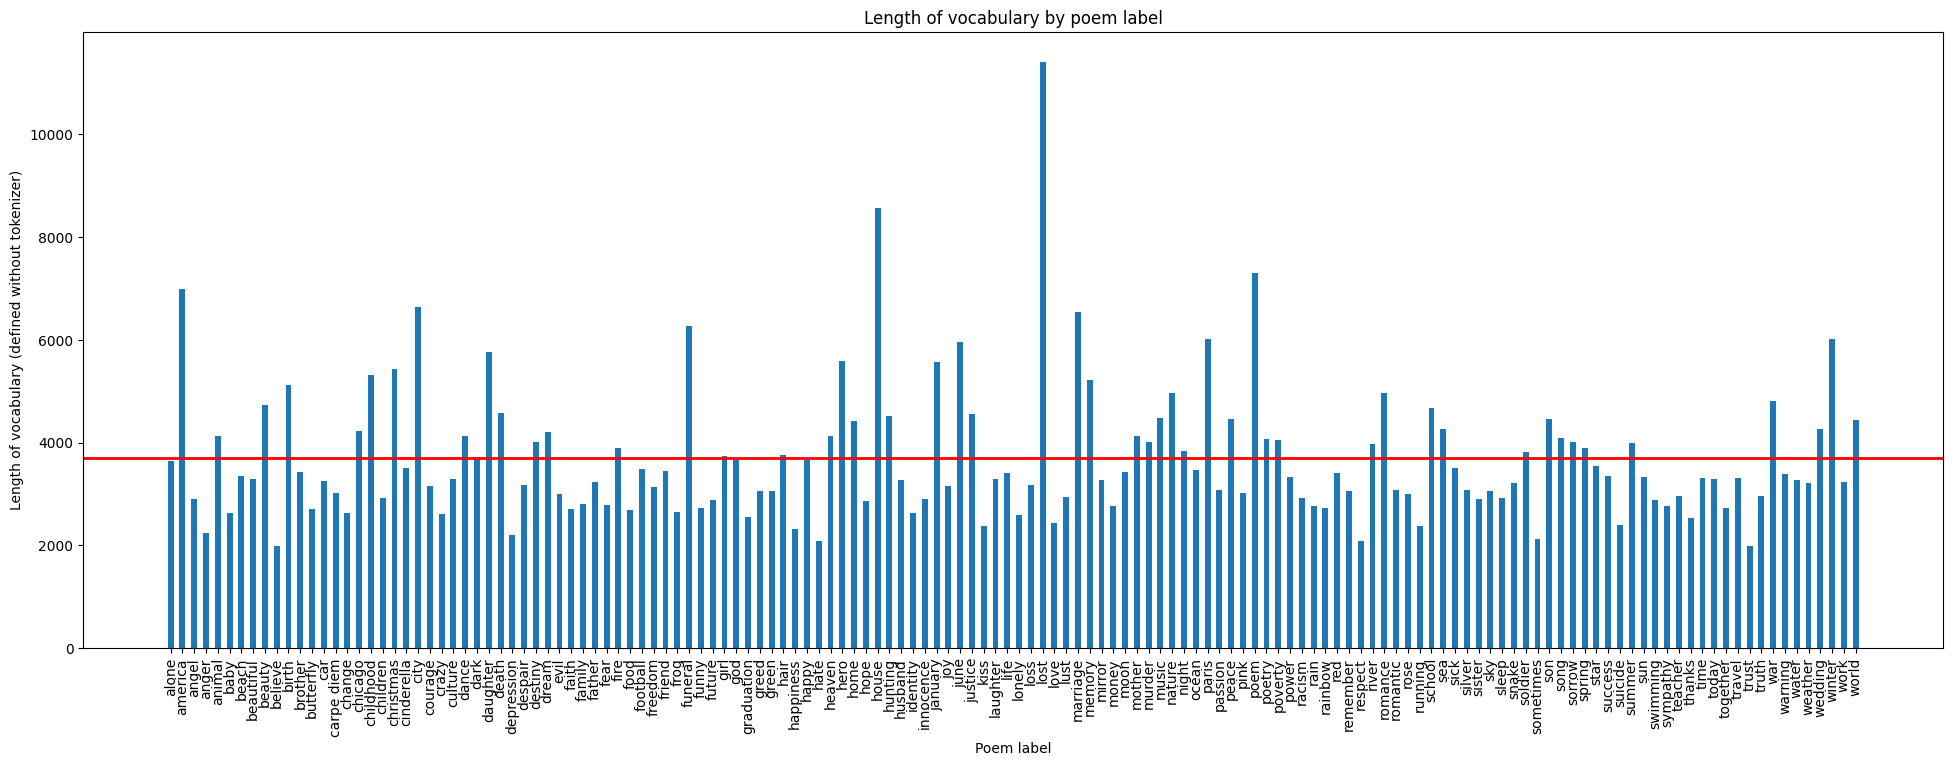

In [14]:
vocab_length_by_label = []
most_occuring_words_by_label = []
labels = np.unique(df["labels"])
for label in labels:
    voc_tmp = " ".join(list(df[df["labels"] == label]["poem"])).split()
    vocab_length_by_label.append(len(set(voc_tmp)))
    u, count = np.unique(voc_tmp, return_counts=True)
    count_sort_ind = np.argsort(-count)
    most_occuring_words_by_label.append((u[count_sort_ind][:5], count[count_sort_ind][:5]))

plt.figure(figsize=(24, 8))
plt.bar(x=labels, height=vocab_length_by_label, width=0.5)
plt.xlabel('Poem label')
plt.ylabel('Length of vocabulary (defined without tokenizer)')
plt.title('Length of vocabulary by poem label')

plt.axhline(y=statistics.mean(vocab_length_by_label), color='r', linestyle='-', linewidth=2, label='Mean')
plt.xticks(rotation=90)

plt.show()

In [15]:
for i in range(len(labels)):
    print(f"{labels[i]} : ", end="")
    tmp = most_occuring_words_by_label[i]
    for i in range(5):
        print(f"{tmp[1][i]} occurence(s) of {tmp[0][i]}", end=", ")
    print()
    

alone : 319 occurence(s) of alone, 89 occurence(s) of one, 62 occurence(s) of love, 53 occurence(s) of like, 38 occurence(s) of know, 
america : 1205 occurence(s) of america, 101 occurence(s) of like, 98 occurence(s) of thy, 91 occurence(s) of one, 91 occurence(s) of land, 
angel : 319 occurence(s) of angel, 116 occurence(s) of love, 71 occurence(s) of like, 66 occurence(s) of know, 62 occurence(s) of one, 
anger : 380 occurence(s) of anger, 49 occurence(s) of like, 45 occurence(s) of dont, 37 occurence(s) of away, 36 occurence(s) of angry, 
animal : 143 occurence(s) of animal, 98 occurence(s) of like, 85 occurence(s) of one, 63 occurence(s) of animals, 46 occurence(s) of us, 
baby : 263 occurence(s) of baby, 83 occurence(s) of love, 55 occurence(s) of little, 52 occurence(s) of like, 46 occurence(s) of heart, 
beach : 170 occurence(s) of beach, 90 occurence(s) of sea, 77 occurence(s) of love, 63 occurence(s) of sand, 58 occurence(s) of like, 
beautiful : 275 occurence(s) of beautiful,

As we can see, there is a lot of diversity in the most used words for each category, so a CountVectorizer might be a good start for embedding.

In [37]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['poem'])

In [17]:
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LogisticRegression(multi_class="multinomial", max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [19]:
y_pred = model.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred, digits=4)}")

Classification Report:
              precision    recall  f1-score   support

       alone     0.3125    0.2381    0.2703        21
     america     0.6154    0.3810    0.4706        21
       angel     0.6000    0.6000    0.6000        20
       anger     0.7143    0.6818    0.6977        22
      animal     0.5909    0.5200    0.5532        25
        baby     0.5294    0.4737    0.5000        19
       beach     0.4706    0.5333    0.5000        15
   beautiful     0.4643    0.5200    0.4906        25
      beauty     0.3182    0.4375    0.3684        16
     believe     0.7083    0.7727    0.7391        22
       birth     0.2667    0.1905    0.2222        21
     brother     0.4706    0.5000    0.4848        16
   butterfly     0.7059    0.6000    0.6486        20
         car     0.6667    0.6364    0.6512        22
  carpe diem     0.5833    0.5833    0.5833        24
      change     0.5000    0.3889    0.4375        18
     chicago     0.6875    0.4583    0.5500        24
   c

Very bad result, might try with lemmatization.

In [34]:
lemmatizer = WordNetLemmatizer()
df["poem"] = df["poem"].apply(lambda poem: " ".join([lemmatizer.lemmatize(word) for word in poem.split()]))

C:\Users\mael\AppData\Local\Temp\ipykernel_3760\80727599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["poem"] = df["poem"].apply(lambda poem: " ".join([lemmatizer.lemmatize(word) for word in poem.split()]))


In [38]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['poem'])

In [39]:
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = LogisticRegression(multi_class="multinomial", max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [41]:
y_pred = model.predict(X_test)

print(f"Classification Report:\n{classification_report(y_test, y_pred, digits=4)}")

Classification Report:
              precision    recall  f1-score   support

       alone     0.2500    0.1905    0.2162        21
     america     0.6000    0.2857    0.3871        21
       angel     0.5000    0.5000    0.5000        20
       anger     0.6818    0.6818    0.6818        22
      animal     0.5652    0.5200    0.5417        25
        baby     0.5000    0.4737    0.4865        19
       beach     0.4444    0.5333    0.4848        15
   beautiful     0.4167    0.4000    0.4082        25
      beauty     0.2692    0.4375    0.3333        16
     believe     0.7727    0.7727    0.7727        22
       birth     0.2308    0.1429    0.1765        21
     brother     0.3750    0.3750    0.3750        16
   butterfly     0.6667    0.6000    0.6316        20
         car     0.6190    0.5909    0.6047        22
  carpe diem     0.5000    0.5417    0.5200        24
      change     0.4615    0.3333    0.3871        18
     chicago     0.6875    0.4583    0.5500        24
   c